## Importing Dependencies

In [1]:
# importing dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

## Loading Dataset

In [2]:
# loading data
iris = load_iris(as_frame=True)
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Silhoutte Method

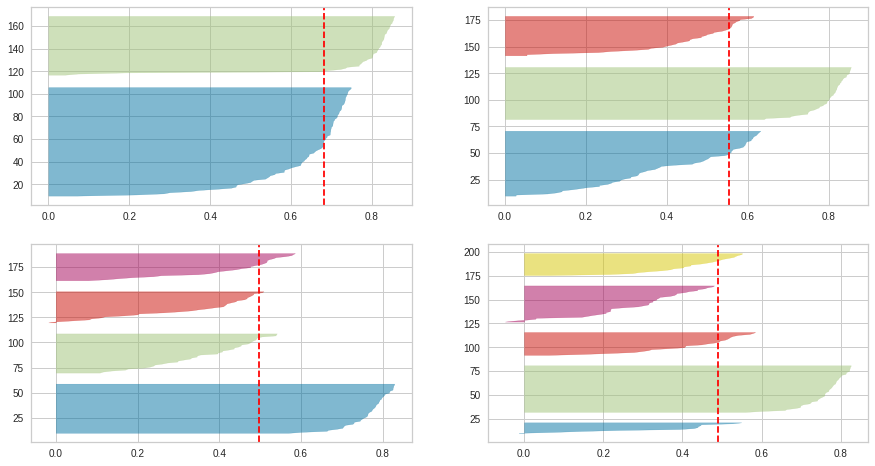

In [3]:
# silhoutte method to find the optimal k

fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    
    ## creating KMeans instances for different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    ## creating SilhouetteVisualizer instance with KMeans instance fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df.drop('target', axis=1))

## 3 Looks like the optimal number for k

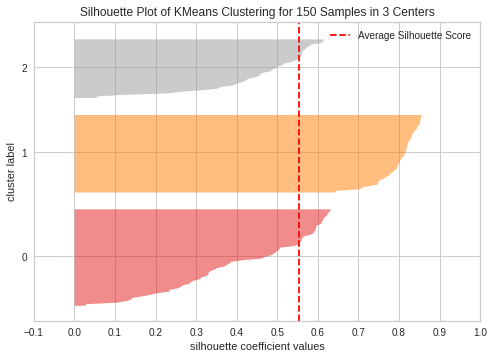

In [4]:
# silhoutte method to find the optimal k
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(df.drop(['target'], axis=1))
visualizer.show();

## Lets confirm through the Elbow Method

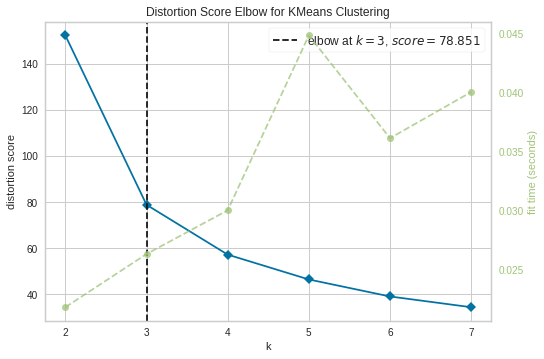

In [5]:
# elbow method to find the optimal k
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,8))
visualizer.fit(df.drop('target', axis=1))
visualizer.show();

## Model Training

In [6]:
# training a model
kmeans = KMeans(n_clusters=3)
kmeans.fit(iris.data)

KMeans(n_clusters=3)

In [7]:
# creating a new column for labels/cluster numbers
df['clusters'] = kmeans.labels_

## Visualizing the Results

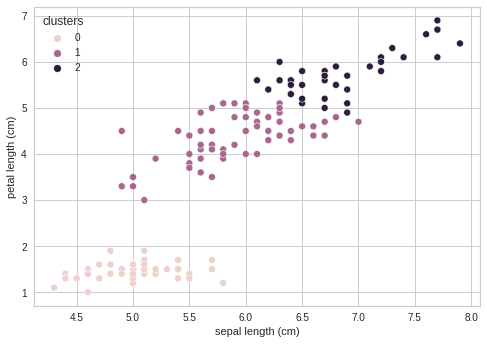

In [8]:
# plotting the clusters
sns.scatterplot(data=df, x=df['sepal length (cm)'], y=df['petal length (cm)'], hue='clusters');